In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, imsave
import cv2
import numpy as np

def load(file_path):
    image = imread(file_path)
    return image

def display(image,title="Image"):
    plt.figure(figsize=[5,5])
    channels=len(image.shape)
    if channels<3:
        plt.imshow(image,cmap='Greys_r');
    else:
        plt.imshow(image);      
    plt.title(title);plt.axis("on");        



In [5]:
def dip(img):

    
#     img=resizeImage(img,1500)
    

    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray = cv2.equalizeHist(gray)



    #image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #Gaussian blur
    gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)

    #Canny edge detection
    edges = cv2.Canny(gray_blur, 40, 41)

    #threshold to the image to convert it to a binary image
    ret, thresh = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY)

    #morphological closing operation to fill in any gaps in the edges
    kernel = np.ones((30,30), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # dilation is applied
    kernel = np.ones((15,15), np.uint8)
    dilation = cv2.dilate(closing, kernel, iterations=1)

#     display(dilation,'Test'+str(i))

    #Finding contours in the image
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    #Iterating through the contours to find the one with the largest area
    max_area = 0
    max_contour = None
    max_size=0
    for contour in contours:
        image=dilation
        area = cv2.contourArea(contour)

            
        # contours of noise can be eliminated here    
        if area>1 :
            # draw a rectangle around the contour
            x, y, w, h = cv2.boundingRect(contour)
            x, y, w, h = int(x), int(y), int(w), int(h)

            # created a new image the size of original image
            c_image=np.zeros(image.shape[:2], dtype=np.uint8)
            
            # draw contour on new image
            cv2.drawContours(c_image, [contour], -1, (255, 255, 255), -1)
            
            # crop the image to the size of rectangle around the contour
            c_roi = c_image[y:y+h, x:x+w]
            
            # count non zero pixels in cropped image
            nonzero = cv2.countNonZero(c_roi)

            #Find the total number of pixels in the cropped image
            total = c_roi.shape[0] * c_roi.shape[1]

            # count zero pixels in cropped image
            zero = total - nonzero
            
            # calulate ratio of non zero pixels to zero pixels
            if zero>0:
                ratio=(nonzero/zero)*area
            else:
                ratio=nonzero*area
                

            # if ratio is highest, we have a new contender for cnic
            if ratio>max_area:
                max_area=ratio
                max_contour=contour
                roi = img[y:y+h, x:x+w]
                
                           
            

    return roi



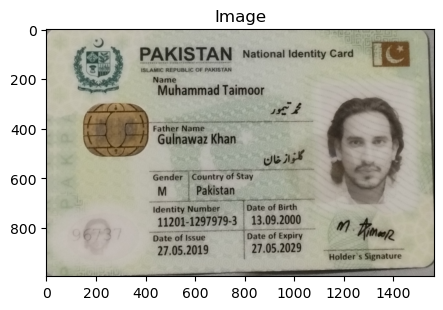

In [6]:
img=load('./test/test (1).jpg')

dis
img2=dip(img)

display(img2)